In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import riesling as rl

In [16]:
%env RL_VERBOSITY=0
prefix='algos'
!rm {prefix}*.h5
matrix = 63
voxsz = 3
channels = 4
!riesling phantom {prefix} --matrix={matrix} --vox-size={voxsz} --channels={channels} --nex=0.125
!riesling sense-sim {prefix} --matrix={matrix} --vox-size={voxsz} --channels={channels}
!riesling recon --fwd --sense={prefix}-sense.h5 {prefix}.h5
!mv {prefix}-recon.h5 {prefix}.h5
!riesling sdc {prefix}.h5 --kernel=ES7

env: RL_VERBOSITY=0


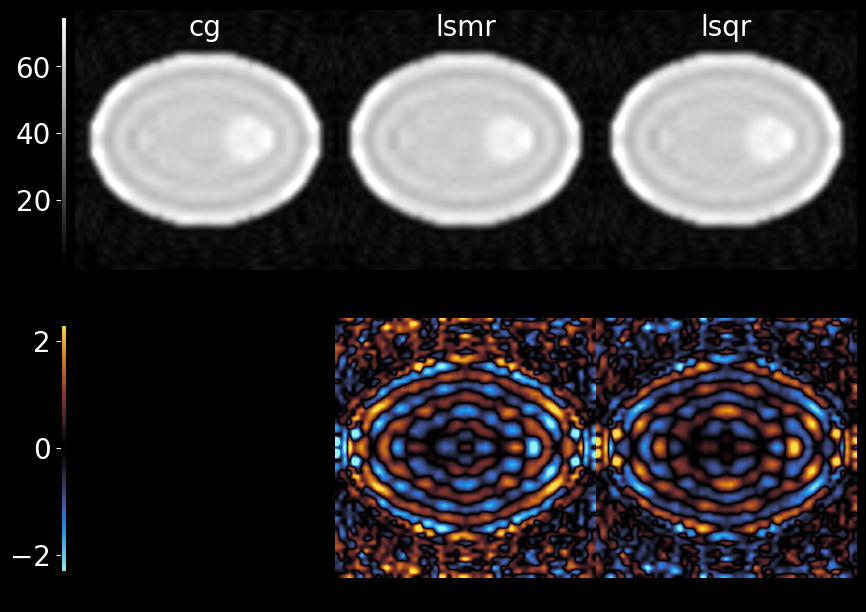

In [17]:
its=8
algos=['cg','lsmr','lsqr']
opts={'lsmr':f'--sdc=none --pre --max-its={its}', 'lsqr':f'--sdc=none --pre --max-its={its}', 'cg':f'--sdc={prefix}-sdc.h5 --max-its={its}'}
for a in algos:
    !riesling {a} {opts[a]} {prefix}.h5 --out={prefix} --sense={prefix}-sense.h5 --debug={a}-debug.h5
files=[f'{prefix}-{a}.h5' for a in algos]
rl.images.diffL(files, titles=algos)

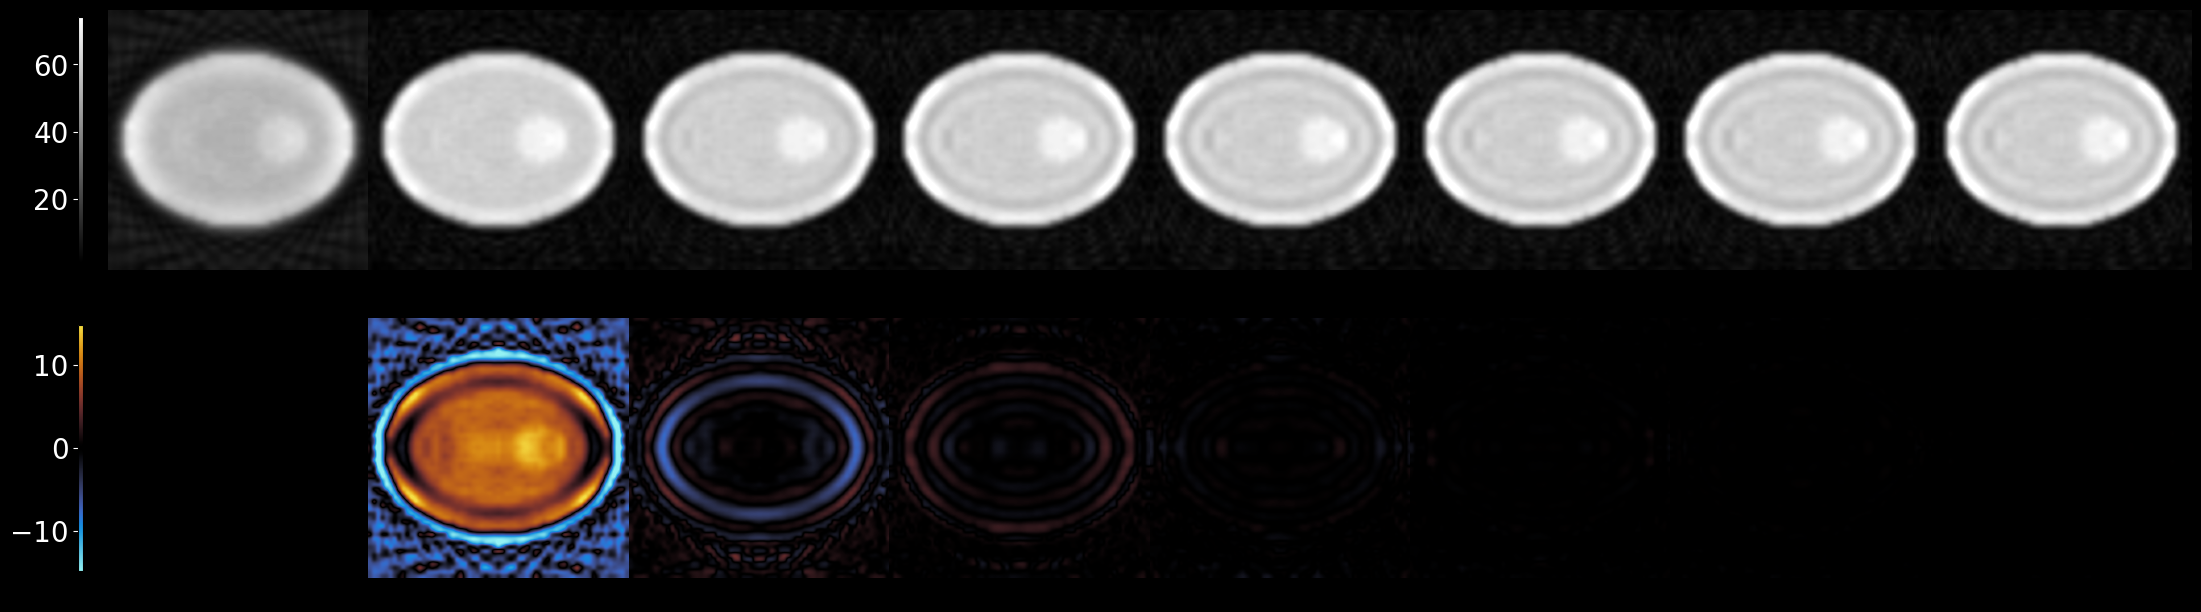

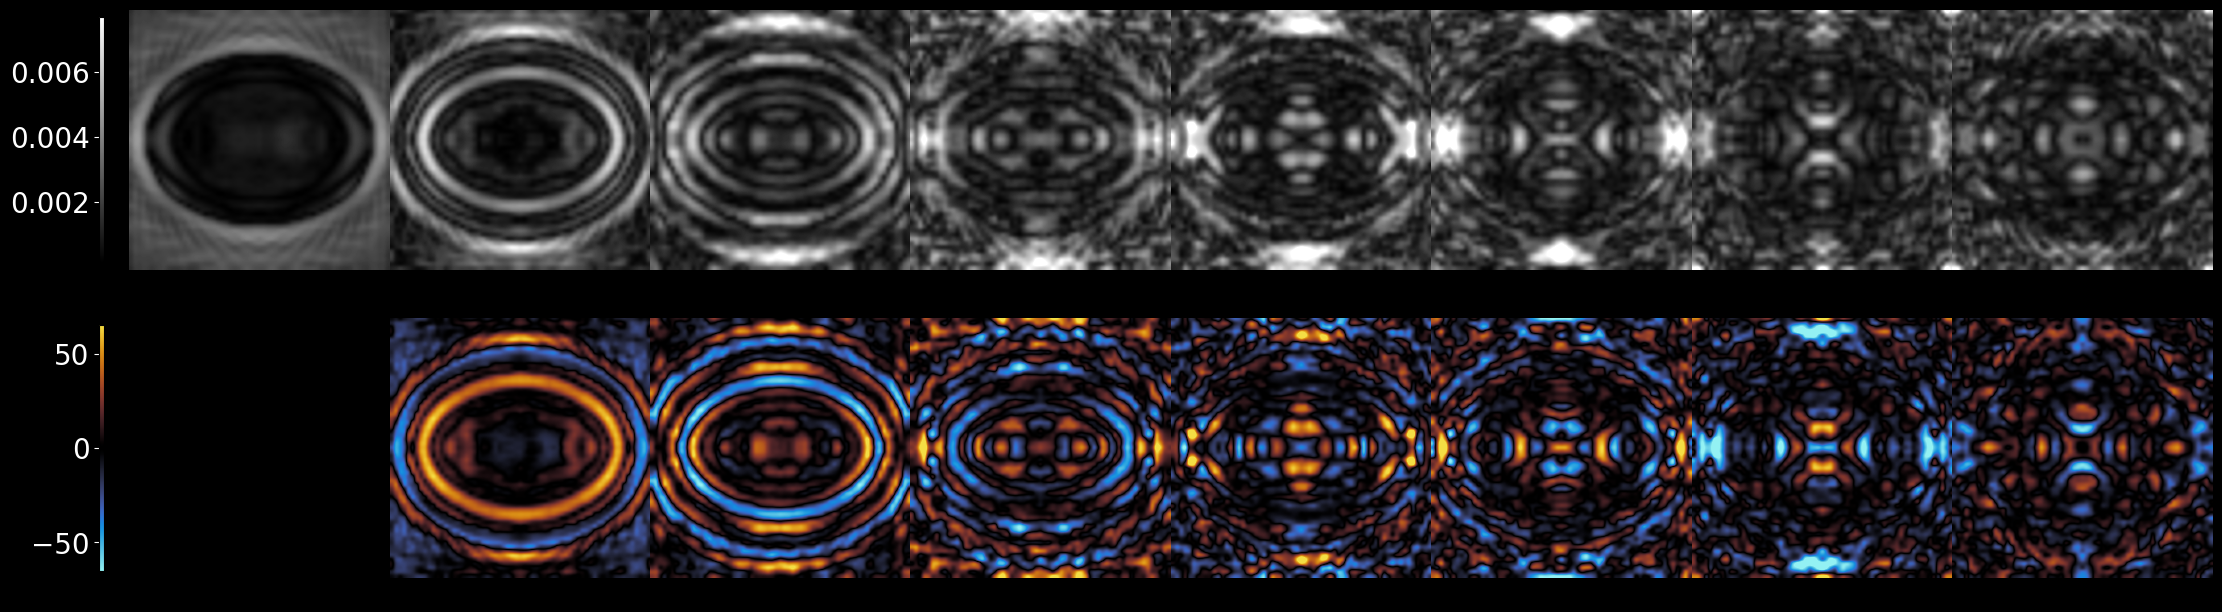

In [18]:
files=['lsmr-debug.h5',]*its
dsets=[f'lsmr-x-{i:02d}' for i in range(its)]
display(rl.images.diffL(files, dsets=dsets))
dsets=[f'lsmr-v-{i:02d}' for i in range(its)]
rl.images.diffL(files, dsets=dsets)

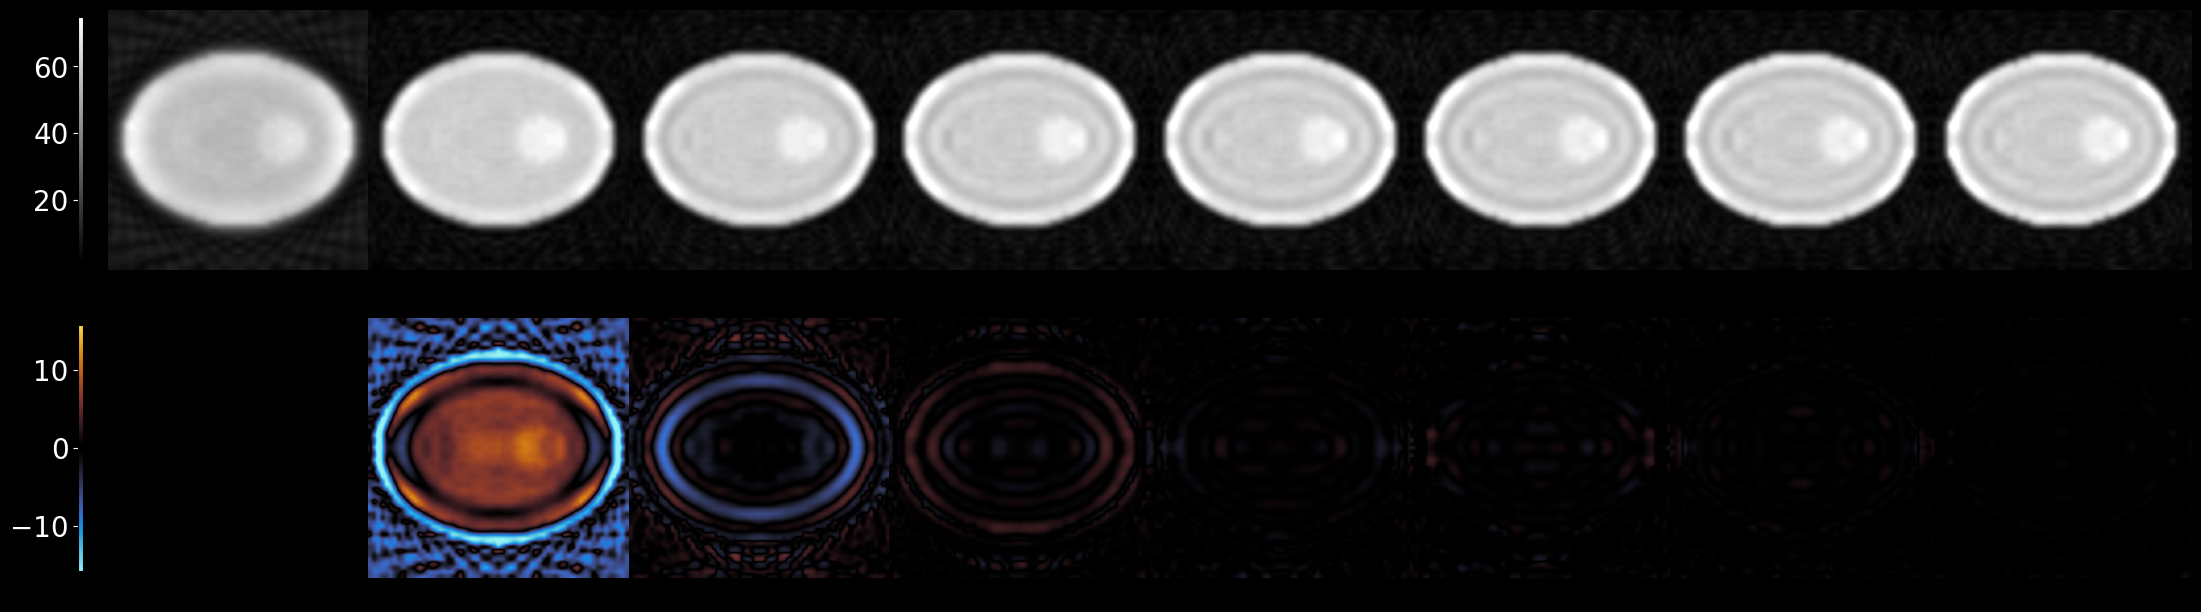

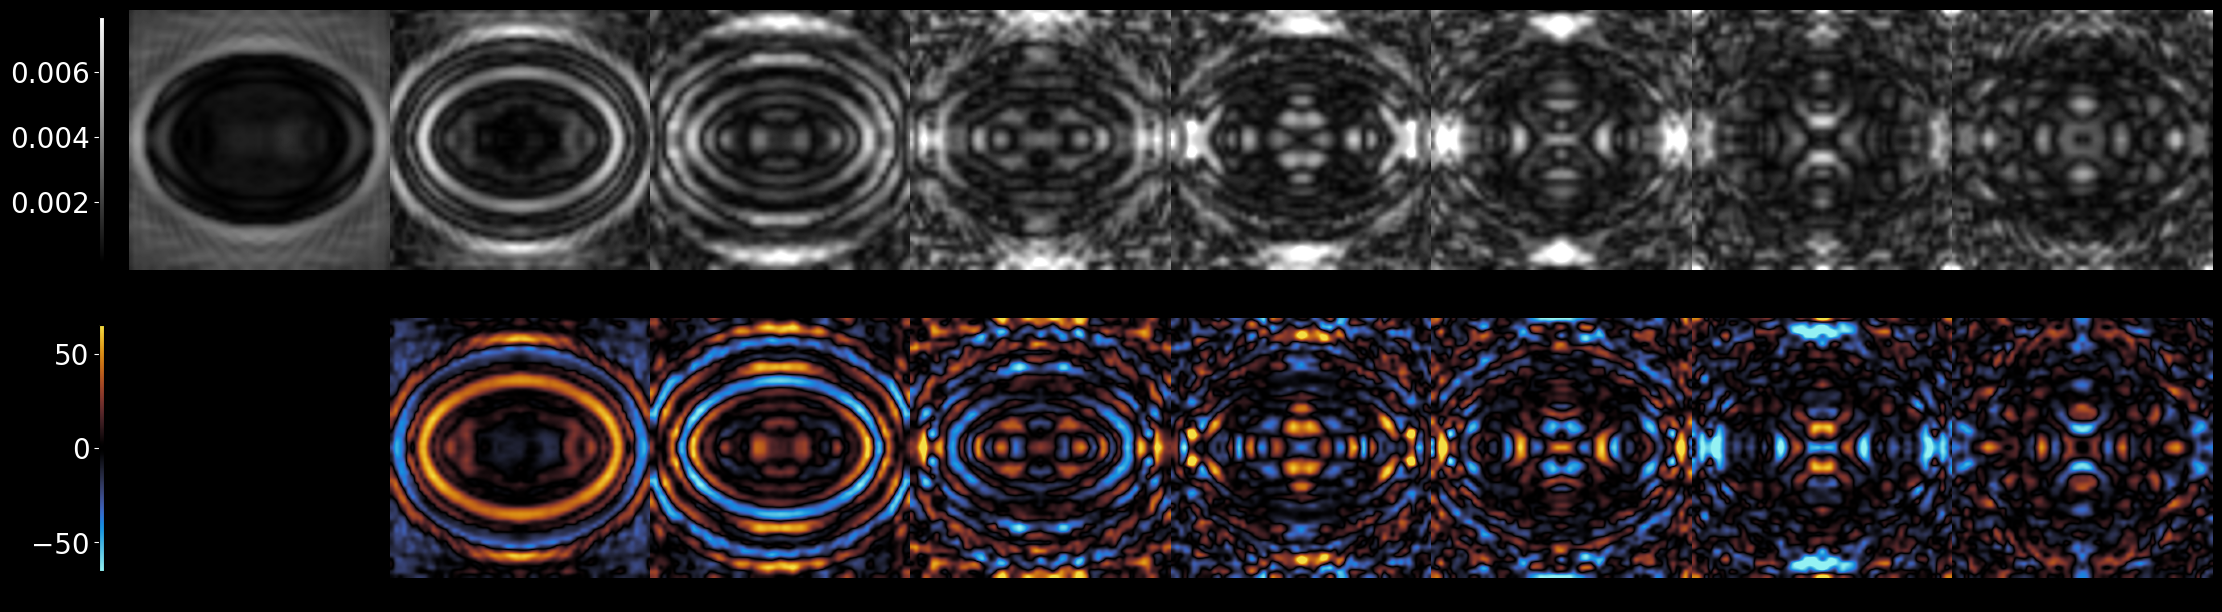

In [19]:
files=['lsqr-debug.h5',]*its
dsets=[f'lsqr-x-{i:02d}' for i in range(its)]
display(rl.images.diffL(files, dsets=dsets))
dsets=[f'lsqr-v-{i:02d}' for i in range(its)]
display(rl.images.diffL(files, dsets=dsets))

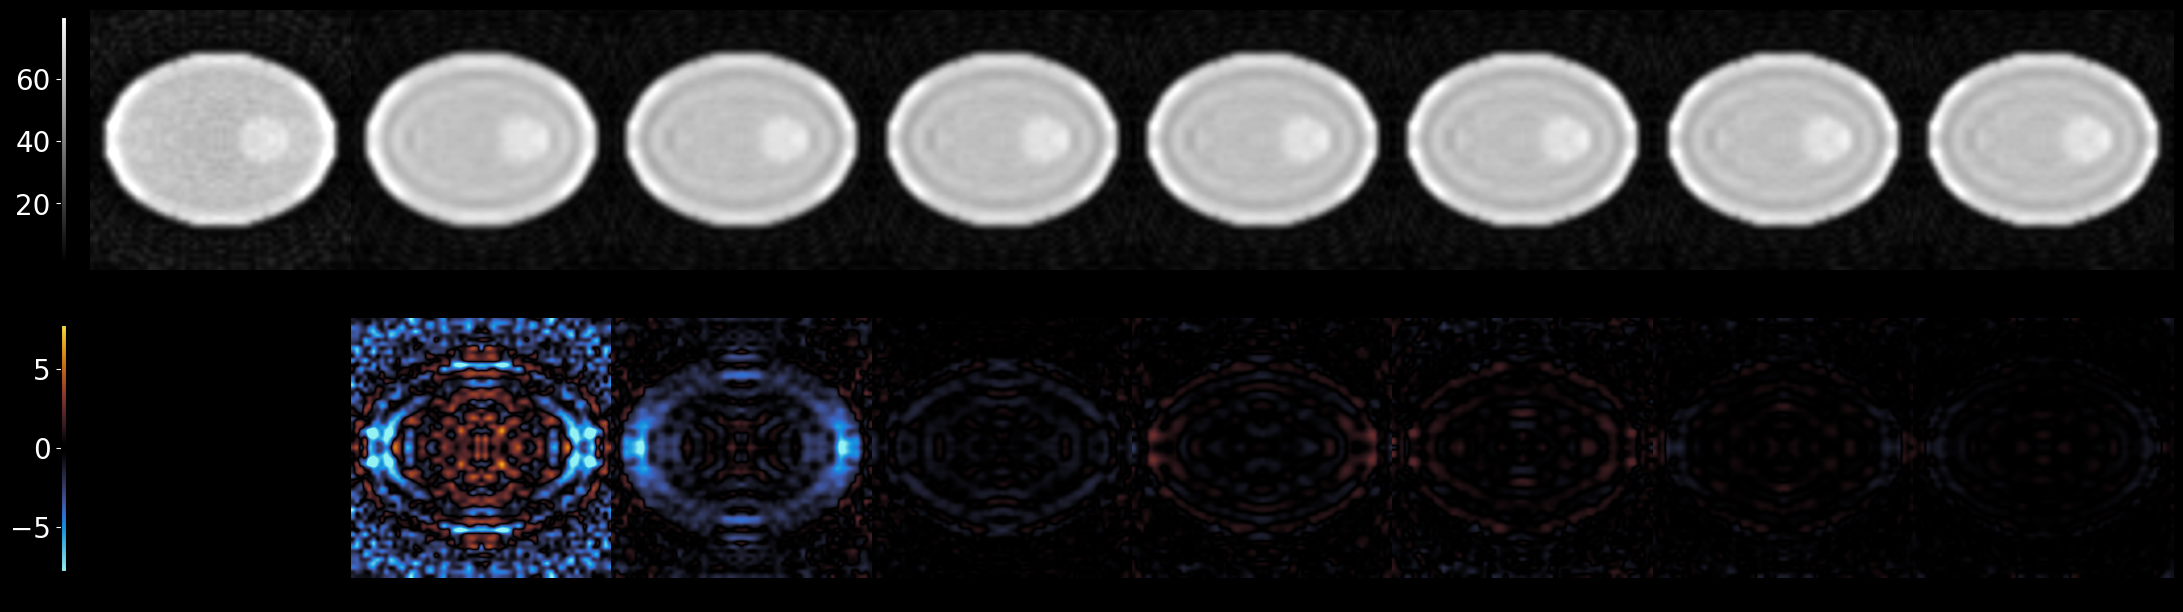

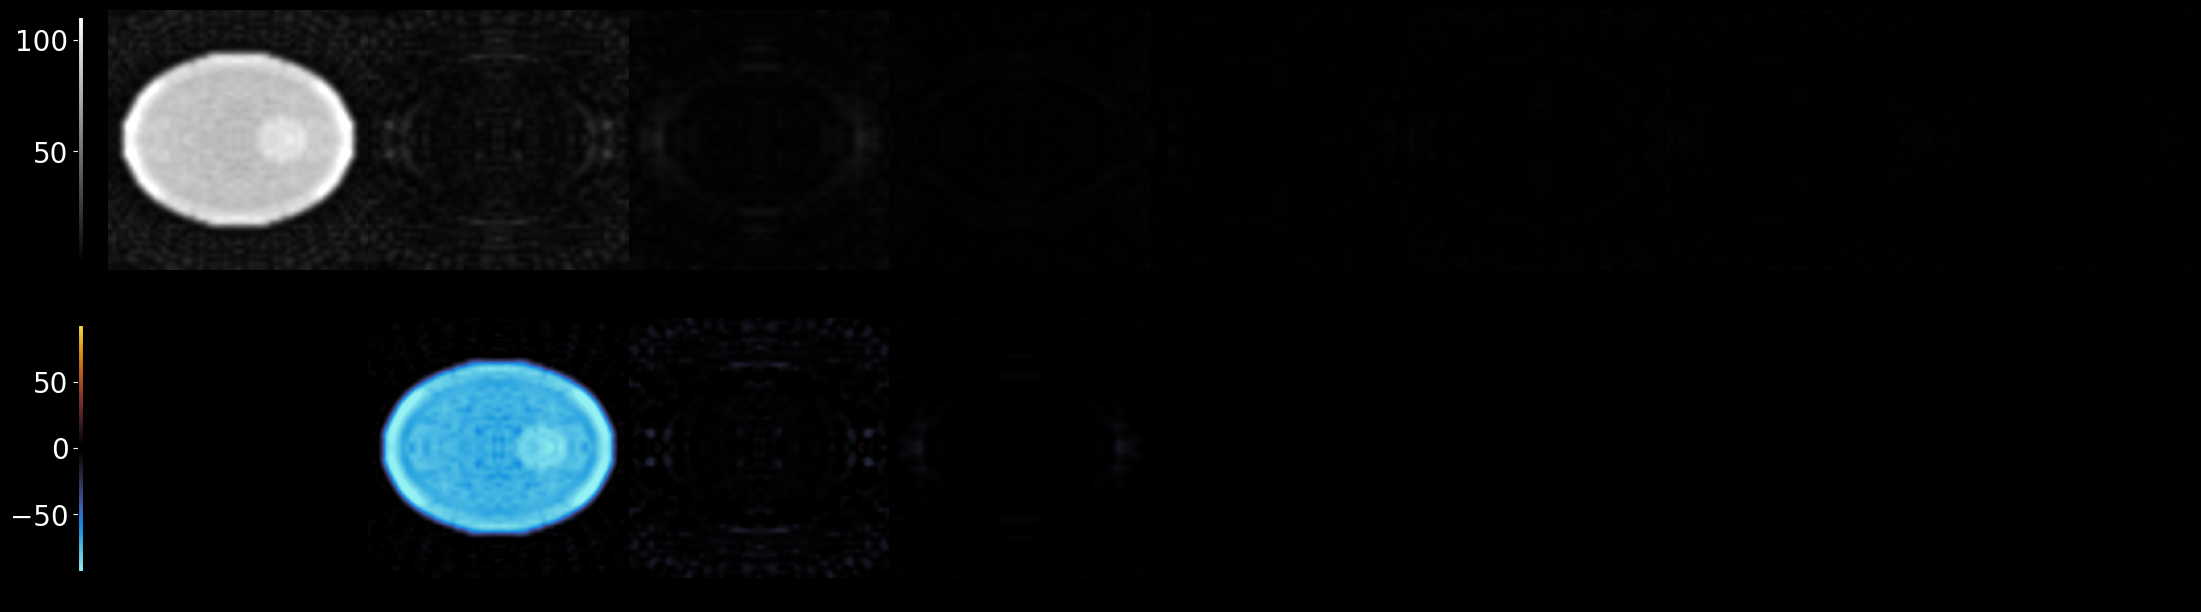

In [20]:
files=['cg-debug.h5',]*its
dsets=[f'cg-x-{i:02d}' for i in range(its)]
display(rl.images.diffL(files, dsets=dsets))
dsets=[f'cg-p-{i:02d}' for i in range(its)]
display(rl.images.diffL(files, dsets=dsets))